In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [38]:
df = pd.read_csv('cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [39]:
df.shape

(1406, 24)

In [40]:
df["windex"] = np.where(df.WAB > 7, "True", "False")
df1 = df.loc[df["POSTSEASON"].str.contains("F4|S16|E8", na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [41]:
df1["POSTSEASON"].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

In [42]:
!conda install -c anaconda seaborn -y

'"C:\Users\jpanc\anaconda3\condabin\..\Scripts\conda.exe"' is not recognized as an internal or external command,
operable program or batch file.


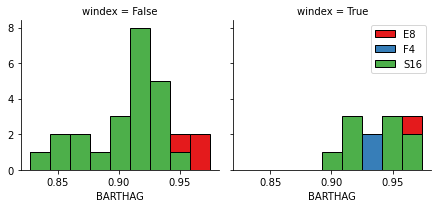

In [43]:
bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, "BARTHAG", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

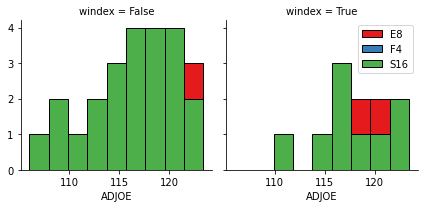

In [44]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, "ADJOE", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

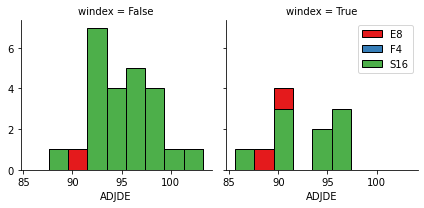

In [45]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, "ADJDE", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [46]:
df1.groupby(["windex"])["POSTSEASON"].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

In [47]:
df1["windex"].replace(to_replace=["False", "True"], value=[0,1], inplace=True)

C:\Users\jpanc\AppData\Local\Temp\ipykernel_2940\3632247572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["windex"].replace(to_replace=["False", "True"], value=[0,1], inplace=True)


In [328]:
x = df1[["G", "W", "ADJOE", "ADJDE", "BARTHAG","EFG_O", "EFG_D", "TOR", "TORD", "ORB", "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T", "WAB", "SEED", "windex"]]
x[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [329]:
y = df1["POSTSEASON"].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [330]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

In [331]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)
print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

Train set:  (44, 21) (44,)
Test set:  (12, 21) (12,)


In [332]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [333]:
#Question 1 Solution
neigh = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
neigh

KNeighborsClassifier()

In [334]:
yhat = neigh.predict(x_test)
acc_score = metrics.accuracy_score(y_test, yhat)
print(acc_score)

0.6666666666666666


In [335]:
#Question 2 Solution
k = 16
mean_acc = np.zeros(k-1)
std_acc = np.zeros(k-1)

for n in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yat)
    std_acc[n-1] = np.std(yat==y_test) / np.std(yat.shape[0])

mean_acc

C:\Users\jpanc\AppData\Local\Temp\ipykernel_2940\2344075580.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  std_acc[n-1] = np.std(yat==y_test) / np.std(yat.shape[0])
C:\Users\jpanc\AppData\Local\Temp\ipykernel_2940\2344075580.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  std_acc[n-1] = np.std(yat==y_test) / np.std(yat.shape[0])
C:\Users\jpanc\AppData\Local\Temp\ipykernel_2940\2344075580.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  std_acc[n-1] = np.std(yat==y_test) / np.std(yat.shape[0])
C:\Users\jpanc\AppData\Local\Temp\ipykernel_2940\2344075580.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  std_acc[n-1] = np.std(yat==y_test) / np.std(yat.shape[0])
C:\Users\jpanc\AppData\Local\Temp\ipykernel_2940\2344075580.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  std_acc[n-1] = np.std(yat==y_test) / np.std(yat.shape[0])
C:\Users\jpanc\AppData\Local\Temp\ipykernel_2940\2344075580.

array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333, 0.58333333])

In [336]:
#Question 3 (min depth to improve results is 5)
from sklearn.tree import DecisionTreeClassifier
md = 21
mean_acc = np.zeros(md)


for n in range(1,md+1):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=21).fit(x_train, y_train)
    yhat = tree.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
mean_acc

array([0.41666667, 0.41666667, 0.5       , 0.5       , 0.41666667,
       0.5       , 0.5       , 0.5       , 0.5       , 0.41666667,
       0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.5       ,
       0.41666667, 0.41666667, 0.5       , 0.5       , 0.5       ,
       0.5       ])

In [337]:
#Question 4 (polynomial seems to be the most accurate kernel)
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
kernels = ["rbf", "linear", "poly", "sigmoid"]
accu = {}

for kernel in kernels:
    svm = SVC(kernel=kernel).fit(x_train, y_train)
    yhat = svm.predict(x_test)
    accu[kernel] = metrics.accuracy_score(y_test, yhat)
    
accu

{'rbf': 0.5833333333333334,
 'linear': 0.25,
 'poly': 0.6666666666666666,
 'sigmoid': 0.5833333333333334}

In [344]:
#Question 5 Part 1
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01, solver="liblinear").fit(x_train, y_train)
yhat = log.predict(x_test)
proba = log.predict_proba(x_test)
proba

array([[0.31220273, 0.3562491 , 0.33154818],
       [0.32510152, 0.32839869, 0.34649979],
       [0.36167465, 0.30610437, 0.33222097],
       [0.38701793, 0.35317957, 0.2598025 ],
       [0.35426016, 0.32763412, 0.31810573],
       [0.34432475, 0.31699257, 0.33868268],
       [0.32217474, 0.33545881, 0.34236644],
       [0.32767214, 0.34639684, 0.32593102],
       [0.34880289, 0.31865572, 0.33254139],
       [0.32108525, 0.30666601, 0.37224874],
       [0.34287302, 0.30377031, 0.35335668],
       [0.33284243, 0.29291228, 0.3742453 ]])

In [346]:
from sklearn.metrics import f1_score, jaccard_score, log_loss

k=40
best_accu = 0
accu = 0
best_k = 0
best_neigh_yhat = 0

for neighbor in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors=neighbor).fit(x_train, y_train)
    neigh_yhat = neigh.predict(x_test)
    accu = accuracy_score(y_test, neigh_yhat)
    if accu > best_accu:
        best_accu = accu
        best_k = neighbor
        best_neigh_yhat = neigh_yhat
        
print("For K-Nearest Neighbor Algorithm:")
print("The best k value is", best_k, "and the best accuracy score is", best_accu)
f1_score = f1_score(y_test, best_neigh_yhat, average="micro")
print("Highest F1 Score is", f1_score)
jaccard_score = jaccard_score(y_test, best_neigh_yhat, average="weighted")
print("Highest Jaccard Score is", jaccard_score)

For K-Nearest Neighbor Algorithm:
The best k value is 5 and the best accuracy score is 0.6666666666666666
Highest F1 Score is 0.6666666666666666
Highest Jaccard Score is 0.525


In [347]:
from sklearn.metrics import f1_score, jaccard_score, log_loss
md = 40
best_accu = 0
accu = 0
best_md= 0
best_dec_yhat = 0

for depth in range(1,md):
    decision = DecisionTreeClassifier(criterion="entropy", max_depth=depth).fit(x_train, y_train)
    dec_yhat = decision.predict(x_test)
    accu = accuracy_score(y_test, dec_yhat)
    if accu > best_accu:
        best_accu = accu
        best_md = depth
        best_dec_yhat = dec_yhat
    

print("For Decision Tree Algorithm:")
print("The best max depth value is", best_md, "and the best accuracy score is", best_accu)
f1_score = f1_score(y_test, best_dec_yhat, average="micro")
jaccard_score = jaccard_score(y_test, best_dec_yhat, average="weighted")
print("Highest F1 Score is", f1_score)
print("Highest Jaccard Score is", jaccard_score)

For Decision Tree Algorithm:
The best max depth value is 1 and the best accuracy score is 0.6666666666666666
Highest F1 Score is 0.6666666666666666
Highest Jaccard Score is 0.48484848484848486


In [348]:
from sklearn.metrics import f1_score, jaccard_score, log_loss
kernels = ["rbf", "linear", "poly", "sigmoid"]
accu = 0
best_accu = 0
best_kernel = ""
best_svm_yhat= 0

for kernel in kernels:
    svm = SVC(kernel=kernel).fit(x_train, y_train)
    svm_yhat = svm.predict(x_test)
    accu = metrics.accuracy_score(y_test, svm_yhat)
    if accu > best_accu:
        best_accu = accu
        best_kernel=kernel
        best_svm_yhat = svm_yhat

    
print("For Support Vector Machine Algorithm: ")
print("The best kernel to utilize is the", best_kernel, "kernel", "and the best accuracy score is", best_accu)
f1_score = f1_score(y_test, best_svm_yhat, average="micro")
jaccard_score = jaccard_score(y_test, best_svm_yhat, average="weighted")
print("Highest F1 Score is ", f1_score)
print('Highest Jaccard Score is ', jaccard_score)

For Support Vector Machine Algorithm: 
The best kernel to utilize is the poly kernel and the best accuracy score is 0.6666666666666666
Highest F1 Score is  0.6666666666666666
Highest Jaccard Score is  0.4444444444444444


In [349]:
from sklearn.metrics import f1_score, jaccard_score, log_loss
accu = 0
best_accu = 0
best_c = 0
solvers = ["liblinear", "lbfgs", "newton-cg", "sag", "saga", "sparse_cg"]
c_vals = [0.01,0.1,1,10,100]
best_log_yhat = 0
best_solver = ""

for solver in solvers:
    for val in c_vals:
        try:
            log = LogisticRegression(C=val, solver=solver).fit(x_train, y_train)
            log_yhat = log.predict(x_test)
            accu = accuracy_score(y_test, log_yhat)
            if accu > best_accu:
                best_accu = accu
                best_c = val
                best_solver = solver
                best_log_yhat = log_yhat
              
            
        except Exception as e:
            print(f"Exception with solver={solver}, C={val}: {e}")
                
print("For Logistic Regression Algorithm:")
print("The best C value is", best_c)
print("The best solver to utilize is", best_solver, "and the best accuracy score is", best_accu)
f1_score = f1_score(y_test, best_log_yhat, average="micro")
jaccard_score = jaccard_score(y_test, best_log_yhat, average="weighted")
print("Highest F1 Score is", f1_score)
print("Highest Jaccard Score is", jaccard_score)

Exception with solver=sparse_cg, C=0.01: The 'solver' parameter of LogisticRegression must be a str among {'saga', 'newton-cg', 'lbfgs', 'sag', 'liblinear', 'newton-cholesky'}. Got 'sparse_cg' instead.
Exception with solver=sparse_cg, C=0.1: The 'solver' parameter of LogisticRegression must be a str among {'saga', 'newton-cg', 'lbfgs', 'sag', 'liblinear', 'newton-cholesky'}. Got 'sparse_cg' instead.
Exception with solver=sparse_cg, C=1: The 'solver' parameter of LogisticRegression must be a str among {'saga', 'newton-cg', 'lbfgs', 'sag', 'liblinear', 'newton-cholesky'}. Got 'sparse_cg' instead.
Exception with solver=sparse_cg, C=10: The 'solver' parameter of LogisticRegression must be a str among {'saga', 'newton-cg', 'lbfgs', 'sag', 'liblinear', 'newton-cholesky'}. Got 'sparse_cg' instead.
Exception with solver=sparse_cg, C=100: The 'solver' parameter of LogisticRegression must be a str among {'saga', 'newton-cg', 'lbfgs', 'sag', 'liblinear', 'newton-cholesky'}. Got 'sparse_cg' instea

C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [350]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model